# Example Out-of-Framework file
This file demonstrates how one can access the modules at different levels of abstraction (highest: access via MnistExperiment, lowest: MnistDataset)
## Analysis of MNIST

### Access via MnistExperiment

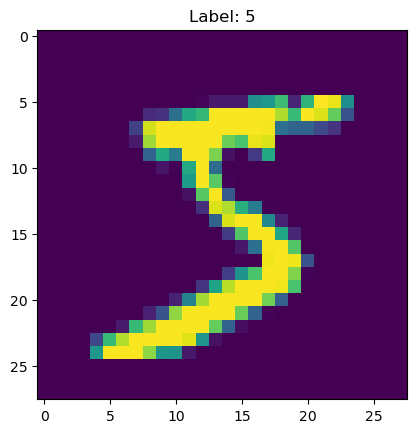

In [8]:
import os
import sys
sys.path.append('/home/mr-robot/Workspaces/ml-experiment-framework/')
from src.datasets.mnist_dataset import MnistDataset, MnistDatasetArgs
from src.args.yaml_config import YamlConfig
from torchvision.datasets import MNIST
import matplotlib.pyplot as plt

from src.experiments.mnist_experiment import MnistExperiment, MnistExperimentArgs



yaml_config = YamlConfig()

ex = MnistExperiment(MnistExperimentArgs(hidden_sizes=[64], experiment_type="mnist", use_cuda=False).model_dump(), yaml_config.config)

train = ex._create_dataset("train")
val = ex._create_dataset("val")
test = ex._create_dataset("test")

sample = train[0]

plt.imshow(sample.input.view(28,28).cpu().numpy())
plt.title(f"Label: {sample.target.argmax().item()}")
plt.show()

Text(0, 0.5, 'N samples')

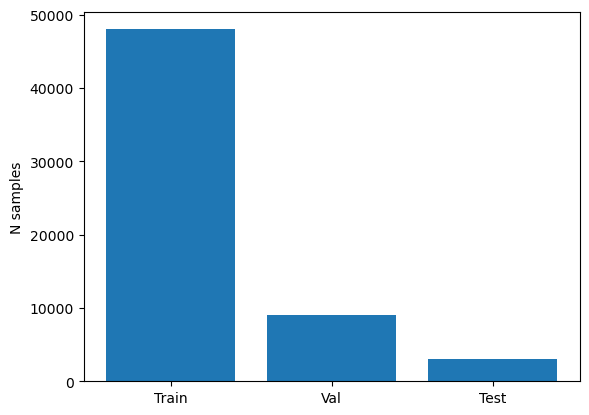

In [12]:
plt.bar(["Train", "Val", "Test"],[len(train), len(val), len(test)])
plt.ylabel("N samples")

### Access via MnistDataset module

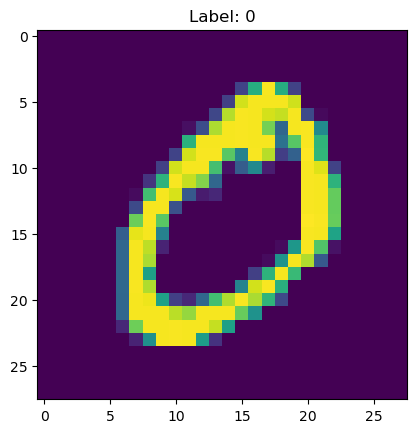

In [10]:
mnist_data = MNIST(
    os.path.join(yaml_config.config.cache_dir, "mnist"),
    download=True,
)

config = MnistDatasetArgs()
train = MnistDataset(mnist_data, config, yaml_config.config, "train")
val = MnistDataset(mnist_data, config, yaml_config.config, "val")
test = MnistDataset(mnist_data, config, yaml_config.config, "test")

sample = train[1]

plt.imshow(sample.input.view(28,28).cpu().numpy())
plt.title(f"Label: {sample.target.argmax().item()}")
plt.show()

Text(0, 0.5, 'N samples')

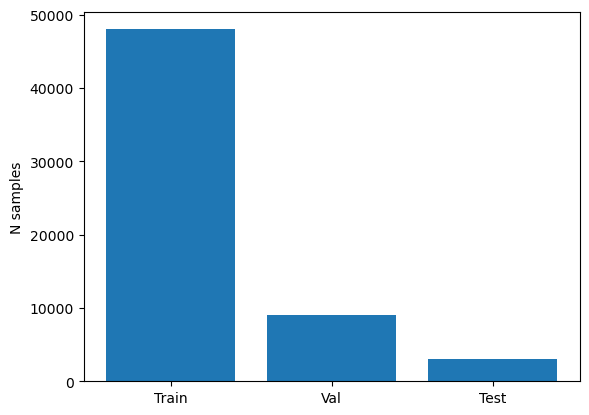

In [13]:
plt.bar(["Train", "Val", "Test"],[len(train), len(val), len(test)])
plt.ylabel("N samples")